In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Placement.csv")
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [4]:
#1.
dataset_drop = dataset.dropna(subset=['salary'])

In [5]:
dataset_drop.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [6]:
#2.
dataset["status"].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [7]:
#3.
non_placement = dataset.groupby("status")[["degree_p", "etest_p", "mba_p"]].mean()
non_placement

,degree_p,etest_p,mba_p
status,,,
Not Placed,61.134179,69.587910,61.612836
Placed,68.740541,73.238041,62.579392


In [8]:
#4.
relation=dataset["mba_p"].corr(dataset["salary"])
print("The relation between salary and mba_p", relation)

The relation between salary and mba_p 0.1750129406952748


In [9]:
#5.
print(dataset.groupby("specialisation")["salary"].min())

specialisation
Mkt&Fin    200000.0
Mkt&HR     200000.0
Name: salary, dtype: float64


In [10]:
#6.
dataset[dataset["salary"]>500000].shape[0]

3

In [11]:
#7.
import scipy.stats as stats
stats.f_oneway(dataset["etest_p"],dataset["mba_p"])

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

In [12]:
#8. Reject null Hypothesis p<0.05
from scipy.stats import ttest_ind
dataset= dataset.dropna()
Sci_Tech= dataset[dataset['degree_t']=='Sci&Tech']["salary"]
Mkt_HR	= dataset[dataset['specialisation']=='Mkt&HR']["salary"]
ttest_ind(Sci_Tech,Mkt_HR)

TtestResult(statistic=2.734391160944239, pvalue=0.007496896218767113, df=92.0)

In [13]:
#9.
import seaborn as sns

def stdNBgraph(dataset):
    mean = dataset.mean()
    std = dataset.std()
    values = [i for i in dataset]
    Z_score= [((i - mean)/std) for i in values]
    sns.distplot(Z_score, kde=True)
    sum(Z_score)/len(Z_score)
    plt.title("Standard Normal Distribution (Z-scores)")
    plt.xlabel("Z-score")
    plt.ylabel("Density")
    plt.show()

C:\Users\Raji\AppData\Local\Temp\ipykernel_2492\2506116628.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Z_score, kde=True)


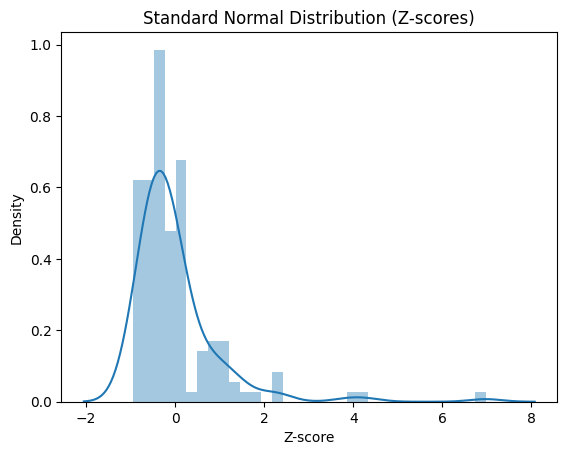

In [14]:
stdNBgraph(dataset["salary"])

C:\Hope AI\AI Course Tamil\3.Data Science\Univariate.py:68: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


Mean=288655.405, Standard Deviation=93457.452
The area between range(700000,900000):5.377578376230696e-06


5.377578376230696e-06

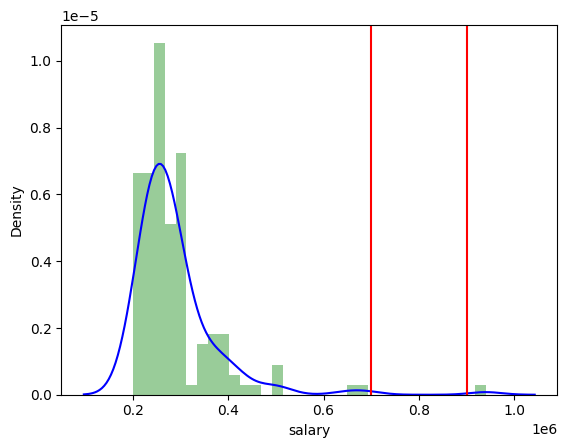

In [15]:
#10.
from Univariate import univariate
univariate.get_pdf_probability(dataset['salary'],700000,900000)

In [16]:
#11.
from scipy.stats import ttest_ind
dataset=dataset.dropna()
Sci_Tech=dataset[dataset['degree_t']=='Sci&Tech']["etest_p"]
Sci_Tech1=dataset[dataset['degree_t']=='Sci&Tech']["mba_p"]
ttest_ind(Sci_Tech,Sci_Tech1)

TtestResult(statistic=4.286330847883898, pvalue=5.027752902669624e-05, df=80.0)

In [17]:
#12.
dataset.select_dtypes(include='number').corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.093480,-0.218428,-0.102250,0.041467,-0.072432,0.063764
ssc_p,-0.093480,1.000000,0.293416,0.380657,0.317892,0.430560,0.035330
hsc_p,-0.218428,0.293416,1.000000,0.221307,0.284672,0.329983,0.076819
degree_p,-0.102250,0.380657,0.221307,1.000000,0.217683,0.494093,-0.019272
etest_p,0.041467,0.317892,0.284672,0.217683,1.000000,0.284143,0.178307
mba_p,-0.072432,0.430560,0.329983,0.494093,0.284143,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


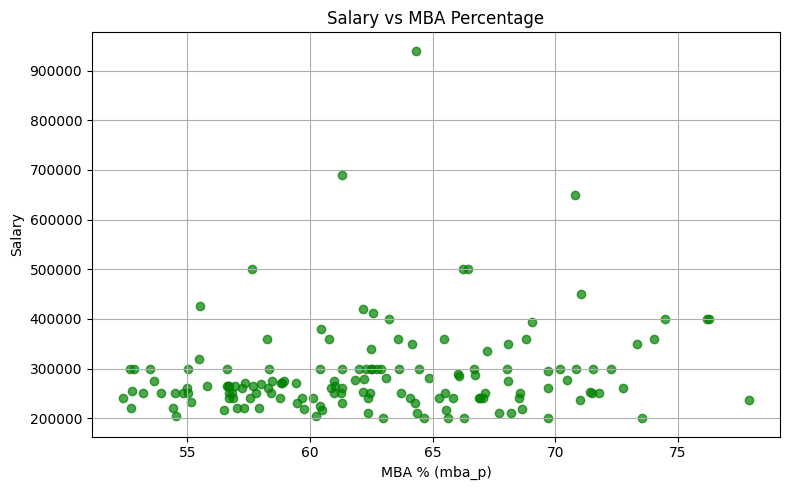

In [18]:
#13.
plt.figure(figsize=(8,5))
plt.scatter(dataset_drop['mba_p'], dataset_drop['salary'], alpha=0.7, color='green')
plt.title('Salary vs MBA Percentage')
plt.xlabel('MBA % (mba_p)')
plt.ylabel('Salary')
plt.grid(True)
plt.tight_layout()
plt.show() 